## 🍷 Wine Quality Prediction — Linear Regression Practice

In this project, my goal is to predict the quality of wine based on its physicochemical properties using a linear regression model. Beyond just building a predictive model, I'm interested in exploring which features most strongly correlate with wine quality and understanding how these factors influence the final rating.

This challenge is a personal exercise to apply the linear regression concepts I've recently learned. I'll be working through data exploration, preprocessing, training, evaluation, and visualization — all while enjoying a good playlist and the process of solving a meaningful machine learning problem. Let's dive in!


In [1]:
import pandas as pd

wines_white = pd.read_csv('./data/winequality-white.csv', delimiter=';')
wines_red = pd.read_csv('./data/winequality-red.csv', delimiter=';')

wines_white.info() # Our data appear to be clean
wines_white.describe()
wines_red.info() # Our data appear to be clean
wines_red.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Challenge Encountered

While loading the dataset with `pd.read_csv()`, pandas failed to auto-detect the delimiter and raised a parsing error. By default, `read_csv()` assumes a comma separator (`","`) when no `sep` or `delimiter` parameter is provided.

After consulting the pandas I/O documentation and community tutorials, I learned that you must explicitly specify the separator. In this case, setting `sep=";"` (or equivalently `delimiter=";"`) correctly parses semicolon-delimited files and resolves the issue.


In [2]:
# We create a new column "type" and give it a value
wines_white["type"] = "white"
wines_red["type"] = "red"

# we unify our datasets into one
wines = pd.concat([wines_red, wines_white])

# Getting dummies
dummies = pd.get_dummies(wines["type"], dtype=int)

# Let's drop column "type" and add our dummies
wines.drop("type", axis=1, inplace=True)
wines = wines.join(dummies)

wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0


<Axes: >

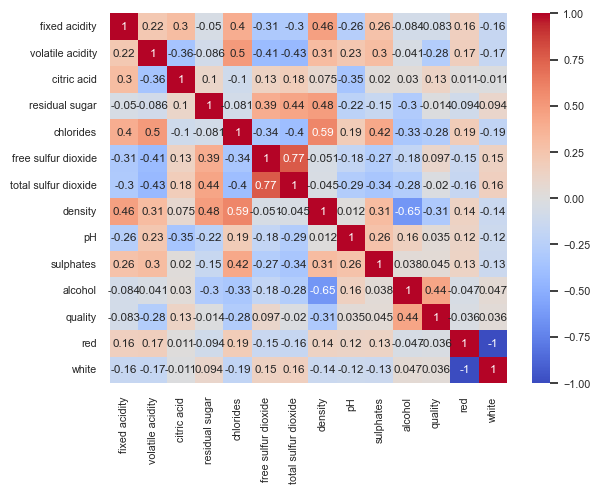

In [29]:
import seaborn as sns

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=0.7, color_codes=True, rc=None)#
sns.heatmap(wines.corr(method='spearman'), cmap="coolwarm", annot=True )

### 🔍 Insight Discovered

I just uncovered an interesting correlation: **alcohol content shows a noticeable positive relationship with wine quality** — higher alcohol tends to align with better quality ratings.

On the other hand, something surprising is that the **wine type** (`red` or `white`) doesn't have a significant impact on quality. The correlation is nearly zero, suggesting that type alone isn't a strong predictor of quality in this dataset.


<Axes: xlabel='quality', ylabel='alcohol'>

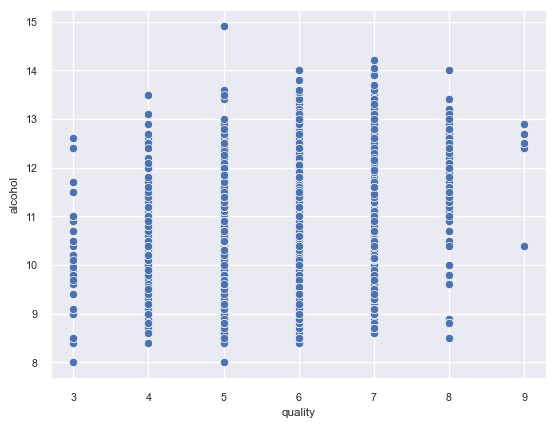

In [31]:
wines.corr()["quality"].sort_values(ascending=False)
sns.scatterplot(x="quality", y="alcohol",data=wines)

## 🔍 Observations & Next Steps

At this point, I decided to pause the linear regression approach because I realized there isn’t a clear linear relationship between `quality` and `alcohol`.

While `alcohol` is a continuous variable, `quality` is **ordinal**, which makes the use of simple linear regression less effective for accurate predictions.

### 📚 What I learned:
- Linear regression assumes both variables are continuous and have a linear correlation.
- `quality` being ordinal means it represents a ranked order, but not necessarily equal intervals between values.

### 🚀 What’s next:
To move forward, I’ll:
- Deepen my understanding of **modern regression techniques** and **ordinal classification**
- Explore **data transformation** techniques that may help make the relationship more predictable

This is a great opportunity to expand my knowledge beyond basic regression and into more advanced modeling strategies!
